In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8534, 0.7361],
        [0.6870, 0.2814]]) 



In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4340, 0.9885, 0.9463],
        [0.9057, 0.5567, 0.8233]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
t1.shape

torch.Size([4, 12])

In [ ]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
# ``tensor.T`` 는 텐서의 전치(transpose)를 반환합니다.
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Dataset, DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1854413.74it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 143964.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2592522.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21788372.34it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



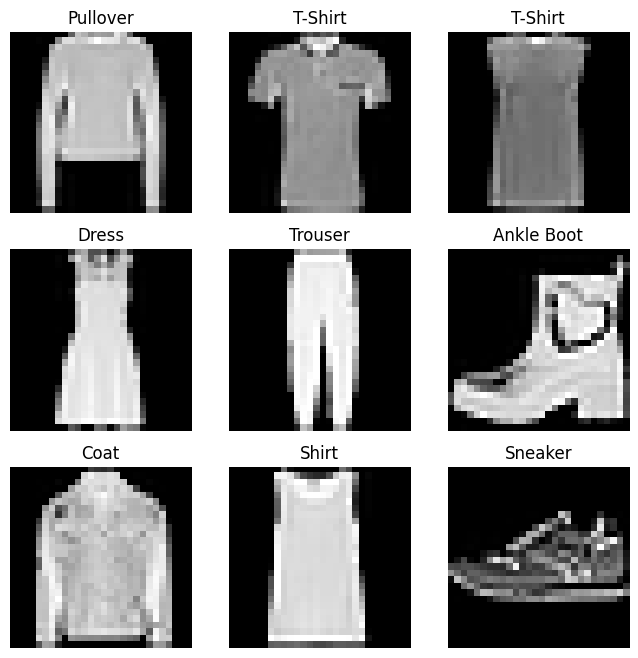

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


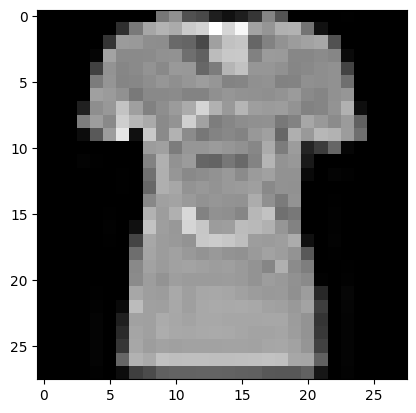

Label: 0


In [ ]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# TRANSFORM

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# 신경망 모델 구성

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')


In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1470, -0.0534, -0.0225,  0.2289,  0.4329,  0.1295,  0.2253,  0.0481,
          0.4335,  0.5771,  0.2103, -0.0134,  0.6733, -0.2512, -0.1216, -0.2328,
          0.0167, -0.1629,  0.1544,  0.2403],
        [-0.4721, -0.2989, -0.2595,  0.1134,  0.2734,  0.2380,  0.3962,  0.0612,
          0.1717,  0.0602,  0.3825,  0.1103,  0.6136, -0.4847, -0.0798, -0.4254,
          0.0906, -0.4389,  0.2653,  0.2859],
        [-0.1641, -0.5198, -0.1361,  0.3971, -0.0445,  0.0411,  0.3725,  0.3407,
         -0.0604,  0.1008,  0.2324, -0.0472,  0.6169, -0.0608, -0.4594, -0.3144,
         -0.3118, -0.1083,  0.0399,  0.1840]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.2289, 0.4329, 0.1295, 0.2253, 0.0481, 0.4335,
         0.5771, 0.2103, 0.0000, 0.6733, 0.0000, 0.0000, 0.0000, 0.0167, 0.0000,
         0.1544, 0.2403],
        [0.0000, 0.0000, 0.0000, 0.1134, 0.2734, 0.2380, 0.3962, 0.0612, 0.1717,
         0.0602, 0.3825, 0.1103, 0.6136, 0.0000, 0.00

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[ 0.1300,  0.2756,  0.2572, -0.2629, -0.2598,  0.4691,  0.0805, -0.1651,
          0.1047, -0.1738],
        [ 0.1231,  0.2308,  0.2479, -0.3430, -0.3192,  0.4653, -0.1744, -0.0476,
          0.0385,  0.0697],
        [ 0.1288,  0.1873,  0.1961, -0.3191, -0.2715,  0.5064, -0.1527, -0.0622,
          0.1325, -0.0368]], grad_fn=<AddmmBackward0>)

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1057, 0.1223, 0.1201, 0.0714, 0.0716, 0.1484, 0.1006, 0.0787, 0.1031,
         0.0780],
        [0.1066, 0.1188, 0.1208, 0.0669, 0.0685, 0.1502, 0.0792, 0.0899, 0.0980,
         0.1011],
        [0.1072, 0.1136, 0.1146, 0.0685, 0.0718, 0.1564, 0.0809, 0.0886, 0.1076,
         0.0908]], grad_fn=<SoftmaxBackward0>)

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0149,  0.0273, -0.0283,  ...,  0.0109, -0.0347,  0.0026],
        [ 0.0016,  0.0166,  0.0136,  ...,  0.0229,  0.0306,  0.0253]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0232,  0.0059], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0202,  0.0436,  0.0174,  ...,  0.0143,  0.0263, -0.0156],
        [ 0.0056, -0.0434,  0.0117,  ...,  0.0175, -0.0194,  0.0329]],
       device='cuda:0', grad_fn=<Sl

# TORCH.AUTOGRAD 를 사용한 자동 미분

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7d10bf0037c0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7d10bf07cf70>


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2663, 0.2312, 0.3212],
        [0.2663, 0.2312, 0.3212],
        [0.2663, 0.2312, 0.3212],
        [0.2663, 0.2312, 0.3212],
        [0.2663, 0.2312, 0.3212]])
tensor([0.2663, 0.2312, 0.3212])


성능 상의 이유로, 주어진 그래프에서의 backward를 사용한 변화도 계산은 한 번만 수행할 수 있습니다. 만약 동일한 그래프에서 여러번의 backward 호출이 필요하면, backward 호출 시에 retrain_graph=True를 전달해야 합니다.

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [ ]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


# 모델 매개변수 최적화하기

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, device = 'cpu'):
    size = len(dataloader.dataset)
    model.to(device)
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn, device='cpu'):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.to(device)

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297115  [   64/60000]
loss: 2.285284  [ 6464/60000]
loss: 2.263046  [12864/60000]
loss: 2.252014  [19264/60000]
loss: 2.241301  [25664/60000]
loss: 2.211997  [32064/60000]
loss: 2.216435  [38464/60000]
loss: 2.177961  [44864/60000]
loss: 2.178637  [51264/60000]
loss: 2.147130  [57664/60000]
Test Error: 
 Accuracy: 54.8%, Avg loss: 2.139008 

Epoch 2
-------------------------------
loss: 2.156612  [   64/60000]
loss: 2.136916  [ 6464/60000]
loss: 2.075248  [12864/60000]
loss: 2.087785  [19264/60000]
loss: 2.028613  [25664/60000]
loss: 1.980661  [32064/60000]
loss: 1.993786  [38464/60000]
loss: 1.911754  [44864/60000]
loss: 1.932170  [51264/60000]
loss: 1.846323  [57664/60000]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.845327 

Epoch 3
-------------------------------
loss: 1.890079  [   64/60000]
loss: 1.844646  [ 6464/60000]
loss: 1.727871  [12864/60000]
loss: 1.768032  [19264/60000]
loss: 1.649115  [25664/60000]
loss: 1.615992  [32064/600

# ConvModel For FashionMnist

In [ ]:
import torch.nn.functional as F

class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(7*7*64, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 7*7*64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
ConvModel = ConvolutionalNeuralNetwork()
x = torch.randn(3,1,28,28)
ConvModel(x)

tensor([[ 0.1057, -0.1021,  0.0819, -0.1463, -0.0554,  0.1747, -0.0449,  0.0478,
          0.0242,  0.0489],
        [ 0.1343, -0.0532,  0.0209, -0.1719, -0.0334,  0.1707, -0.0660,  0.0272,
         -0.0052,  0.0344],
        [ 0.0980, -0.1242,  0.0730, -0.1234, -0.0373,  0.1414, -0.0377,  0.0098,
         -0.0025,  0.0061]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ConvModel.parameters(), lr=learning_rate)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, ConvModel, loss_fn, optimizer, device)
    test_loop(test_dataloader, ConvModel, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307392  [   64/60000]
loss: 2.297056  [ 6464/60000]
loss: 2.292376  [12864/60000]
loss: 2.290117  [19264/60000]
loss: 2.266694  [25664/60000]
loss: 2.267200  [32064/60000]
loss: 2.261605  [38464/60000]
loss: 2.246170  [44864/60000]
loss: 2.238607  [51264/60000]
loss: 2.203076  [57664/60000]
Test Error: 
 Accuracy: 45.9%, Avg loss: 2.192278 

Epoch 2
-------------------------------
loss: 2.208993  [   64/60000]
loss: 2.177320  [ 6464/60000]
loss: 2.107913  [12864/60000]
loss: 2.074932  [19264/60000]
loss: 1.955045  [25664/60000]
loss: 1.845625  [32064/60000]
loss: 1.724701  [38464/60000]
loss: 1.544854  [44864/60000]
loss: 1.451564  [51264/60000]
loss: 1.256456  [57664/60000]
Test Error: 
 Accuracy: 62.6%, Avg loss: 1.227386 

Epoch 3
-------------------------------
loss: 1.325288  [   64/60000]
loss: 1.224886  [ 6464/60000]
loss: 0.998683  [12864/60000]
loss: 1.081104  [19264/60000]
loss: 0.916610  [25664/60000]
loss: 0.954950  [32064/600

# 모델 저장하고 불러오기

In [ ]:
import torch
import torchvision.models as models

In [ ]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 53.9MB/s]


In [ ]:
model = models.vgg16() # 여기서는 ``weights`` 를 지정하지 않았으므로, 학습되지 않은 모델을 생성합니다.
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model = torch.load('model.pth')